<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Visualizacion_datos/blob/main/Pr2_VisualizacionDatos_AnaAlonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib

In [2]:
pip install plotly_express

In [3]:
# Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
# Lectura de la base de datos
filename = 'volume_us_forecast_sample.csv'
data = pd.read_csv(filename, sep = ',')


# Eliminar la columnas que no sirven para el ejercicio
data = data.drop(['COUNTRY', 'GEOGRAPHY', 'SCENARIO_LVL_2', 'MODEL_CAT', 'UNIT', 'AMOUNT_WITHOUT_OUTLIERS', 'DEFAULT_MODEL', 'FORECAST_YEAR'], axis=1)

# Cogemos solo los registros con volumen real positivo
data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)

# Aquellos registros predichos cuyo valor del volumen es menor que 0, los convierto en 0.
data.loc[data['AMOUNT'] < 0, 'AMOUNT'] = 0

# Revisión de los datos
print(data.shape)
data.head(10)

<ipython-input-4-7ba43bc39cc0>:3: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, sep = ',')


(1824048, 9)


<ipython-input-4-7ba43bc39cc0>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data.drop(data[data['SCENARIO'] == 'actual'][data['AMOUNT'] < 0].index)


,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,YEAR,WEEK,SCENARIO,AMOUNT,MODEL_ID,FORECAST
0,AO_FTN_US,CG3_Z59,L2488,2023,20,AI_forecast,0.000000,1.0,W12F
1,AO_FTN_US,CG3_Z59,L2488,2023,21,AI_forecast,9.696815,1.0,W12F
2,AO_FTN_US,CG3_Z59,L2488,2023,22,AI_forecast,0.000000,1.0,W12F
3,AO_FTN_US,CG3_Z59,L2488,2023,23,AI_forecast,0.544680,1.0,W12F
4,AO_FTN_US,CG3_Z59,L2488,2023,24,AI_forecast,8.710286,1.0,W12F
5,AO_FTN_US,CG3_Z63,L2488,2023,13,AI_forecast,10.956305,1.0,W12F
6,AO_FTN_US,CG3_Z63,L2488,2023,14,AI_forecast,9.493839,1.0,W12F
7,AO_FTN_US,CG3_Z63,L2488,2023,15,AI_forecast,10.600820,1.0,W12F
8,AO_FTN_US,CG3_Z63,L2488,2023,16,AI_forecast,9.950980,1.0,W12F
9,AO_FTN_US,CG3_Z63,L2488,2023,17,AI_forecast,9.772367,1.0,W12F


In [5]:
# Observo la tipología de los datos con los que trabajo
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824048 entries, 0 to 1831292
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   CUSTOMER         object 
 1   SEGMENT/CHANNEL  object 
 2   PRODUCT          object 
 3   YEAR             int64  
 4   WEEK             int64  
 5   SCENARIO         object 
 6   AMOUNT           float64
 7   MODEL_ID         float64
 8   FORECAST         object 
dtypes: float64(2), int64(2), object(5)
memory usage: 139.2+ MB


###1.¿Cuáles son las cinco combinaciones más grandes (con mayor volumen) de canal-producto por costumer reales (actuals)?

Primero creamos un dataset que contenga solo los registros reales marcados como 'actual'.

In [6]:
condition = data['SCENARIO'] == 'actual'
data_real = data[condition]
data_real

,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,YEAR,WEEK,SCENARIO,AMOUNT,MODEL_ID,FORECAST
37717,1000006156,CG2_Z19,L2263,2022,16,actual,10719.0000,NaN,NaN
37718,1000006156,CG2_Z16,L2408,2022,16,actual,88.0000,NaN,NaN
37719,1000006156,CG2_Z19,L2426,2022,16,actual,656.6551,NaN,NaN
37720,1000006156,CG2_Z16,L2432,2022,16,actual,443.9056,NaN,NaN
37721,1000007206,CG2_Z01,L2235,2022,16,actual,60.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1717800,AO_FTN_US,CG3_Z34,L2488,2021,7,actual,35.9996,NaN,NaN
1717801,1000006156,CG2_Z16,L2253,2021,8,actual,1330.8750,NaN,NaN
1717802,1000006156,CG2_Z19,L2255,2021,8,actual,597.8184,NaN,NaN
1717803,1000006156,CG2_Z10,L2344,2021,8,actual,0.0000,NaN,NaN


Usando el dataset 'data_real', agrupo por: Customer, Canal y Producto,para poder mostrar todos los productos pertenecientes a un canal y todos los canales pertenecientes a un mismo cliente.

In [7]:
data_real_cust = data_real.groupby(['CUSTOMER', 'SEGMENT/CHANNEL','PRODUCT'])['AMOUNT'].sum().reset_index();

# Observo los 5 diferentes clientes que hay
unique_values = data_real_cust['CUSTOMER'].unique()
unique_values

array(['1000006156', '1000007013', '1000007206', '1000008742',
       'AO_FTN_US'], dtype=object)

A continuación, seleccionamos los 5 mejores canal-producto por cliente.

Cada una de las gráficas muestra las 5 mejores combinaciones de canal-producto para q cliente concreto. Al pasar por encima de cada barra podemos ver el volumen real (sin redondear) de dicha combinación.

Al ser gráficas tan detalladas, se puede hacer una comparativa a simple vista para ver qué cliente tiene las mejores combinaciones, es decir, el mayor volumen de venta de producto-canal, que en este dataset es el cliente: '1000006156'.

Al ser diagramas tan distintos debido a la diferencia de volúmenes entre los distintos clientes, verlo todo en un mismo diagrama o gráfico haría que los datos no se interpretaran correctamente, por lo menos no sería nada claro.

In [9]:
for value in unique_values:
    channel_product = data_real_cust[data_real_cust['CUSTOMER'] == value]
    channel_product = channel_product.sort_values(by='AMOUNT', ascending=False)[0:5]
    channel_product['channel-product'] = channel_product['SEGMENT/CHANNEL'] + " - " + channel_product['PRODUCT']

    # Gráfica
    px.bar(channel_product, x = 'AMOUNT', y = 'channel-product', text_auto='.2s',
           title='Cliente: ' + str(value)).show()

###¿Cuál sería el Error Cuadrático Medio de los canales-productos más grandes de cada customer reales (actuals)? Es decir, para los modelos del apartado previo.

Para poder sacar el Error Cuadrático Medio (MSE), debemos comparar los valores reales con los predichos, ya que la fórmula viene dada por:

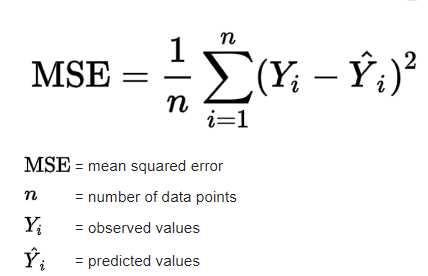

Como los valores reales ya los seleccionamos anteriormente, procedemos a hacer lo propio con los valores predichos, 'AI_forecast' en esta base de datos.

In [10]:
condition = data['SCENARIO'] == 'AI_forecast'
data_pred = data[condition]
data_pred

,CUSTOMER,SEGMENT/CHANNEL,PRODUCT,YEAR,WEEK,SCENARIO,AMOUNT,MODEL_ID,FORECAST
0,AO_FTN_US,CG3_Z59,L2488,2023,20,AI_forecast,0.000000,1.0,W12F
1,AO_FTN_US,CG3_Z59,L2488,2023,21,AI_forecast,9.696815,1.0,W12F
2,AO_FTN_US,CG3_Z59,L2488,2023,22,AI_forecast,0.000000,1.0,W12F
3,AO_FTN_US,CG3_Z59,L2488,2023,23,AI_forecast,0.544680,1.0,W12F
4,AO_FTN_US,CG3_Z59,L2488,2023,24,AI_forecast,8.710286,1.0,W12F
...,...,...,...,...,...,...,...,...,...
1831288,1000007206,CG2_Z27,L2399,2023,11,AI_forecast,0.003348,0.0,W07F
1831289,1000007206,CG2_Z27,L2399,2023,12,AI_forecast,0.005433,0.0,W07F
1831290,1000007206,CG2_Z27,L2399,2023,13,AI_forecast,0.007053,0.0,W07F
1831291,1000007206,CG2_Z27,L2399,2023,14,AI_forecast,0.005785,0.0,W07F


Lo primero es agrupar por cliente, canal y producto pero por fecha, para guardar como serie temporal; para los predichos, será necesario guardar cuándo y con qué modelo se realizó dicha predicción, de forma que agrupamos también por 'MODEL_ID' y 'FORECAST'.

In [11]:
data_real_dated = data_real.groupby(['YEAR', 'WEEK', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['AMOUNT'].mean().reset_index()
data_pred_dated = data_pred.groupby(['YEAR', 'WEEK', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT', 'MODEL_ID', 'FORECAST'])['AMOUNT'].mean().reset_index()

# Realizmos join para saber que datos tenemos en común entre los valores actuals y los forecasts, pues la comparativa
# es con aquellos que sean = tanto en fecha como en la agrupación: cliente-canal-producto.
data_dated = data_real_dated.join(data_pred_dated.set_index(['YEAR', 'WEEK', 'CUSTOMER','SEGMENT/CHANNEL', 'PRODUCT']),
                                           on = ['YEAR', 'WEEK', 'CUSTOMER','SEGMENT/CHANNEL', 'PRODUCT'], how = 'inner', lsuffix='_actual', rsuffix='_forecast')

# Fijamos la fecha en una única columna (no en 2 distintas)
data_dated['DATE'] = pd.to_datetime(data_dated['YEAR'].astype(int).astype(str) + '-' + data_dated['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')

# Calulamos el error de cada forecast por semana con la fórmula: (y-y')^2
data_dated['AMOUNT_MSE'] = (data_dated['AMOUNT_actual'] - data_dated['AMOUNT_forecast'])**2

# Agrupamos con el error calculado
data_dated = data_dated.groupby(['DATE', 'CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT', 'MODEL_ID'])['AMOUNT_MSE'].mean().reset_index()
data_dated

for value in unique_values:
  channel_product = data_real_cust[data_real_cust['CUSTOMER'] == value]
  channel_product = channel_product.sort_values(by = 'AMOUNT', ascending = False)[0:5]

  # Empty DataFrame para guardar los distintos errores cuadráticos medios
  # en función de los 5 mejores canales-productos por cliente del apartado anterior
  df_empty = pd.DataFrame()

  # Bucle que recorre de 0 al número de filas
  for i in range(0, (channel_product.shape[0])):
    fila = channel_product.iloc[i]

    # Establecemos la siguiente condición para que se quede con un cliente específico
    # y tome solo las filas del dataset en el que se hizo la join y se calculó el
    # error cuadrático para seleccionar solo los registros que sean iguales a la fila
    condition = (data_dated['CUSTOMER'] == value) & (data_dated['SEGMENT/CHANNEL'] == fila['SEGMENT/CHANNEL']) & (data_dated['PRODUCT'] == fila['PRODUCT'])

    # Dividimos nuestros valores entro lo que "n", número de filas que cumplen dicha condición
    data_dated[condition]['AMOUNT_MSE'] = data_dated[condition]['AMOUNT_MSE']

    # Se guarda en el empty dataframe. Cuando termine el bucle, df_empty contendrá
    # el MSE por fecha de cada cliente-canal-producto.
    df_empty = pd.concat([df_empty, data_dated[condition]],
                         ignore_index = True)

    # Grafica de la serie temporal de los MSE
    px.line(data_dated[condition], x = 'DATE', y = 'AMOUNT_MSE', color = 'MODEL_ID', markers=True,
            title = 'Cliente: ' + value + '; Canal: ' + fila['SEGMENT/CHANNEL'] + '; Producto: ' + fila['PRODUCT']).show()

  df_empty['channel-product'] = df_empty['SEGMENT/CHANNEL'] + '-' + df_empty['PRODUCT']
  df_empty = df_empty.groupby(['CUSTOMER', 'channel-product', 'MODEL_ID'])['AMOUNT_MSE'].mean().reset_index()

  # Grafica del MSE total por cada canal-producto para ver cual tiene el menor MSE
  px.histogram(df_empty, x = 'channel-product', y = 'AMOUNT_MSE',
               color = 'MODEL_ID', title = 'Cliente: ' + value, barmode = 'group',
               text_auto='.2s').show()

<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-11-2685cc5f1015>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



El gráfico de líneas se ha elegido porque es la manera correcta para ver una serie temporal. Podemos observar que ambos modelos de predicción (0 y 1) dan el mismo valor (no se ve la línea azul porque se encuentra por debajo de la roja). Y en los histogramas vemos que el MSE es el mismo siempre. Destacamos que estos resultados no son muy realistas, ya que la predicción en función del modelo debería variar.

Cabe puntualizar que, al haber volúmenes de MSE tan dispares en los datos de un mismo cliente, el histograma, no sería la mejor opción, puesto que queda muy descompensado.Sin embargo,debido a que se pueden ver los valores exactos de cada volumen de MSE encima de cada barra, tampoco está tan mal, pues es fácil de interpretar.

###¿Cuáles serían las previsiones de los 2 modelos mejores por cliente de las series temporales anteriores?

In [12]:
# Es suficiente un solo modelo
data_dated = data_dated[data_dated['MODEL_ID'] == 0]

In [13]:
# Empty DataFrame para guardar las dos mejores prediciones por cliente
best_2_pred = pd.DataFrame()

for value in unique_values:
  channel_product = data_real_cust[data_real_cust['CUSTOMER'] == value]
  channel_product = channel_product.sort_values(by = 'AMOUNT', ascending = False)[0:5]

  # Crea un DataFrame vacío donde se va a acumular los distintos errores cuadráticos
  # en función de los 5 mejores canales-productos de cada customer
  df_empty = pd.DataFrame()

  # Número de filas
  numFilas = channel_product.shape[0]

  for i in range(0, numFilas):
    fila = channel_product.iloc[i]

    # Establecemos que solo queremos aquellos datos que cumplan esta condición
    condition = (data_dated['CUSTOMER'] == value) & (data_dated['SEGMENT/CHANNEL'] == fila['SEGMENT/CHANNEL']) & (data_dated['PRODUCT'] == fila['PRODUCT'])

    # Dividimos nuestros valores entro lo que "n", número de filas que cumplen dicha condición
    data_dated[condition]['AMOUNT_MSE'] = data_dated[condition]['AMOUNT_MSE']

    # Lo guardamos en el dataframe, de tal forma que al final de este bucle, esta variable contendra
    # el error cuadrático medio por fecha de cada customer/canal/producto
    df_empty = pd.concat([df_empty, data_dated[condition]],
                         ignore_index = True)


  # Sacamos las 2 mejores predicciones
  best_2_pred = pd.concat([best_2_pred, df_empty.groupby(['CUSTOMER', 'SEGMENT/CHANNEL', 'PRODUCT'])['AMOUNT_MSE'].mean().reset_index().sort_values(by = 'AMOUNT_MSE', ascending = True)[0:2]],
                                 ignore_index = True)

<ipython-input-13-5ce437d7dae9>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-5ce437d7dae9>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-5ce437d7dae9>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-13-5ce4

Creo un dataframe que contenga los mejores modelos de predicción. Y grafico los actuals junto a los valores predichos para poder ver cómo se ajustan los valores.

In [14]:
# Fijamos la fecha en una única columna (no en 2 distintas)
data['DATE'] = pd.to_datetime(data['YEAR'].astype(int).astype(str) + '-' + data['WEEK'].astype(int).astype(str) + '-' + '1', format='%Y-%W-%w')

for i in range(0, best_2_pred.shape[0]):
  fila = best_2_pred.iloc[i]

  # Creamos el dataframe para graficar
  df = data[data['CUSTOMER'] == fila['CUSTOMER']][data['SEGMENT/CHANNEL'] == fila['SEGMENT/CHANNEL']][data['PRODUCT'] == fila['PRODUCT']]
  df = df.drop(df[df['MODEL_ID'] == 1].index)
  df['channel-product'] = df['SEGMENT/CHANNEL'] + '-' + df['PRODUCT']
  df = df.groupby(['DATE','CUSTOMER','channel-product','SCENARIO'])['AMOUNT'].mean().reset_index()

  # Gráfica
  px.line(df, x = 'DATE', y = 'AMOUNT', color = 'SCENARIO', markers = True,
          title = 'Cliente: ' + value + '; Canal: ' + fila['SEGMENT/CHANNEL'] + '; Producto: ' + fila['PRODUCT']).show()

<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<ipython-input-14-de2168432ed1>:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Se observa cómo la línea de predicciones (forecast) converge bastante bien a la línea de valores reales (actual).

Si bien, aquellos valores reales que suponen un cambio muy abrupto frente a lo que va haciendo la gráfica, la predicción es errónea. Es decir, cuanto menos estable ha sido el volumen de venta de un producto en un cierto canal por un cierto cliente, peor es su predicción.

Al igual que en el caso anterior, elegimos un gráfico de líneas para ver la evolución de ambas en el tiempo y poder compararlas fácilmente.